In [1]:
import pandas as pd
import pylab as plt 
import seaborn as sns
import numpy as np
import math
from sklearn.utils import Bunch 
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
preparedf = pd.read_csv('Labor_Market_Data_Transforming.csv')
preparedf.head(3)

,SCALEGENERE,SCALETA,SCALESETTORE,SCALETITOLO,SCALECONTRATTO,SCALEMOD,SCALEPROVINCIA,SCALETIPO,SCALENAZIONE
0,1,4,3,0,0,4,0,0,2
1,1,1,3,0,0,4,0,0,1
2,1,1,3,0,1,2,0,0,1


## Linear regression

In [3]:
#create one new dataframes 'reg1', starting from preparedf, taking only "SCALETA" and "SCALETITOLO"
reg1=preparedf[["SCALETA","SCALETITOLO"]]

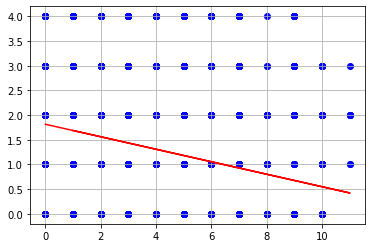

In [4]:
#create a linear Regression Model, fitting it with "SCALETA" and "SCALETITOLO"
model = LinearRegression()
model.fit(reg1[["SCALETITOLO"]],reg1[["SCALETA"]])
yfit = model.predict(reg1[["SCALETITOLO"]])
plt.scatter(reg1[["SCALETITOLO"]],reg1[["SCALETA"]], color="blue")
plt.grid()
plt.plot(reg1[["SCALETITOLO"]],yfit, color="red")

In [5]:
#print the degree of correlation between "SCALETA" and "SCALETITOLO", referring to the dataframe using three different methods.
pearson_corr = reg1["SCALETITOLO"].corr(reg1["SCALETA"])
rho_corr = reg1["SCALETITOLO"].corr(reg1["SCALETA"], method='spearman')
tau_corr = reg1["SCALETITOLO"].corr(reg1["SCALETA"], method='kendall')

print("Correlation between UAW and Real_Effort_Person_Hours ")
print("Pearson's r correlation: ", pearson_corr)
print("Spearman's rho correlation: ",rho_corr)
print("Kendall's tau correlation: ",tau_corr)

Correlation between UAW and Real_Effort_Person_Hours 
Pearson's r correlation:  -0.09789789601997351
Spearman's rho correlation:  -0.10093957328019779
Kendall's tau correlation:  -0.0832120236450019


In [6]:
#print the coefficient of determination of the dataframe
r_sq = np.round(model.score(reg1[["SCALETITOLO"]],reg1[["SCALETA"]]),4)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.0096


In [7]:
#create one new dataframes 'reg2', starting from preparedf, taking only "SCALETA" and "SCALETITOLO"
reg2=preparedf[["SCALETA","SCALECONTRATTO"]]

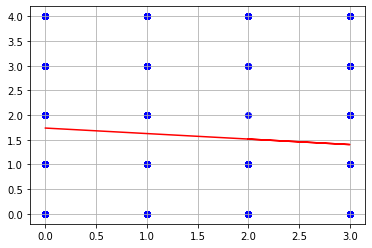

In [8]:
#create a linear regression model, fitting it with "SCALETA" and "SCALECONTRATTO"
model = LinearRegression()
model.fit(reg2[["SCALECONTRATTO"]],reg2[["SCALETA"]])
yfit = model.predict(reg2[["SCALECONTRATTO"]])
plt.scatter(reg2[["SCALECONTRATTO"]],reg2[["SCALETA"]], color="blue")
plt.grid()
plt.plot(reg2[["SCALECONTRATTO"]],yfit, color="red")

In [9]:
#print the degree of correlation between "SCALETA" and "SCALECONTRATTO", referring to the dataframe using three different methods.
pearson_corr = reg2["SCALECONTRATTO"].corr(reg2["SCALETA"])
rho_corr = reg2["SCALECONTRATTO"].corr(reg2["SCALETA"], method='spearman')
tau_corr = reg2["SCALECONTRATTO"].corr(reg2["SCALETA"], method='kendall')

print("Correlation between UAW and Real_Effort_Person_Hours ")
print("Pearson's r correlation: ", pearson_corr)
print("Spearman's rho correlation: ",rho_corr)
print("Kendall's tau correlation: ",tau_corr)

Correlation between UAW and Real_Effort_Person_Hours 
Pearson's r correlation:  -0.07663822572425835
Spearman's rho correlation:  -0.047573965208065956
Kendall's tau correlation:  -0.04116308258430227


C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


In [10]:
#print the coefficient of determination of the dataframe
r_sq = np.round(model.score(reg2[["SCALECONTRATTO"]],reg2[["SCALETA"]]),4)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.0059


## K-Nearest Neighbors Classification

In [11]:
#Select only people having Age > 30 that belong to 'ATTIVATO' 
scarto = pd.read_csv('Labor_Market_Data_Transforming.csv')
scarto = scarto[scarto["SCALETIPO"] == 0] 
scarto = scarto[(scarto["SCALETA"] != 0)]
scarto.head(3)

,SCALEGENERE,SCALETA,SCALESETTORE,SCALETITOLO,SCALECONTRATTO,SCALEMOD,SCALEPROVINCIA,SCALETIPO,SCALENAZIONE
0,1,4,3,0,0,4,0,0,2
1,1,1,3,0,0,4,0,0,1
2,1,1,3,0,1,2,0,0,1


In [12]:
#Size reduction, taking 1 every 5 value 
x = scarto.copy()
x = scarto.loc[0::5]
x.reset_index(inplace=True, drop=True)
x.head(3)

,SCALEGENERE,SCALETA,SCALESETTORE,SCALETITOLO,SCALECONTRATTO,SCALEMOD,SCALEPROVINCIA,SCALETIPO,SCALENAZIONE
0,1,4,3,0,0,4,0,0,2
1,1,2,4,0,0,3,0,0,0
2,0,2,3,2,1,4,0,0,0


In [13]:
x.describe()

,SCALEGENERE,SCALETA,SCALESETTORE,SCALETITOLO,SCALECONTRATTO,SCALEMOD,SCALEPROVINCIA,SCALETIPO,SCALENAZIONE
count,8762.000000,8762.000000,8762.000000,8762.000000,8762.000000,8762.000000,8762.000000,8762.0,8762.000000
mean,0.670281,2.516092,1.156928,0.990641,0.593015,3.201552,0.077836,0.0,0.285095
std,0.470138,1.170941,1.409574,1.141173,1.122590,1.330031,0.336651,0.0,0.835099
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.000000
50%,1.000000,2.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.0,0.000000
75%,1.000000,4.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,4.000000,4.000000,9.000000,3.000000,4.000000,2.000000,0.0,4.000000


In [14]:
#Dropping useless columns
y = pd.DataFrame(x['SCALEGENERE'].copy()) 
x.drop(labels=['SCALEGENERE'], inplace=True, axis=1)
x.drop(labels=['SCALETIPO'], inplace=True, axis=1)
x.drop(labels=['SCALECONTRATTO'], inplace=True, axis=1)
x.drop(labels=['SCALEMOD'], inplace=True, axis=1)
x.head(3)

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,SCALETA,SCALESETTORE,SCALETITOLO,SCALEPROVINCIA,SCALENAZIONE
0,4,3,0,0,2
1,2,4,0,0,0
2,2,3,2,0,0


In [15]:
#Specific that we will use 30% of the dataframe for the test phase, the rest will be used for the train phase
#using random you are going to always have the same random draw
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(x, y, test_size = 0.3, random_state = 13)

In [16]:
from sklearn import preprocessing

def scaleFeaturesDF(data_train, data_test):
    # Feature scaling is a type of transformation that only changes the scale, but not number of features. 
    # Because of this, we can still use the original dataset's column names
    transf = preprocessing.MinMaxScaler().fit(data_train)
    data_train = transf.transform(data_train)
    data_train = pd.DataFrame(data_train)
    data_test = transf.transform(data_test)
    data_test = pd.DataFrame(data_test)
    
    return data_train, data_test

In [17]:
[data_train, data_test]=scaleFeaturesDF(data_train, data_test)

In [18]:
# Applying Dimensionality Reduction (PCA)
model = None
Test_PCA = False

if Test_PCA:
    print('Computing 2D Principle Components')
    
    from sklearn.decomposition import PCA
    
    model = PCA(n_components=2, svd_solver = 'full')
    model.fit(data_train)
    PCA(copy=True, n_components=2, whiten=False)
    data_train = model.transform(data_train)
    data_test = model.transform(data_test)
        

else:
    print('Computing 2D Isomap Manifold')
   
    from sklearn import manifold
    from sklearn.manifold import Isomap
    
    model = manifold.Isomap(n_neighbors = 7, n_components=2)
    model.fit(data_train)
    Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_neighbors= 7, neighbors_algorithm='auto', path_method='auto', tol=0)
    data_train = model.transform(data_train)
    data_test = model.transform(data_test)

Computing 2D Isomap Manifold


C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\sklearn\manifold\_isomap.py:302: UserWarning: The number of connected components of the neighbors graph is 66 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_in

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Am

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Am

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Am

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Am

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Am

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Am

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Am

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Am

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Am

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Am

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Am

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Am

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Am

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Am

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\daddc\anaconda3\envs\Am

In [19]:
#Classification with KNN
from sklearn.neighbors import KNeighborsClassifier

knmodel = KNeighborsClassifier(n_neighbors = 5, weights='uniform')
knmodel.fit(data_train, label_train.iloc[:,0])

KNeighborsClassifier()

In [20]:
#Calculate and display the accuracy of the testing set
knmodel.score(data_test, label_test)

0.7291745910992773

In [21]:
# Predict the label of data_test
prediction = knmodel.predict(data_test)
prediction = pd.DataFrame(prediction)

In [22]:
#Plot of KNN graph
def plotDecisionBoundary(model, X, y):

    fig = plt.figure()
    ax = fig.add_subplot(111)

    padding = 0.1
    resolution = 0.1

    colors = {0:'royalblue', 1:'lightsalmon'} 


    # Calculate the boundaris
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # Create a 2D Grid Matrix. The values stored in the matrix
    # are the predictions of the class at at said location
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # What class does the classifier say?
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour map
    plt.contourf(xx, yy, Z, cmap=plt.cm.seismic)
    plt.axis('tight')

    # Plot your testing points
    for label in np.unique(y):
        indices = np.where(y == label)
        plt.scatter(X[indices, 0], X[indices, 1], c = colors[label], alpha=0.8)

    p = model.get_params()
    plt.title('K = ' + str(p['n_neighbors']))

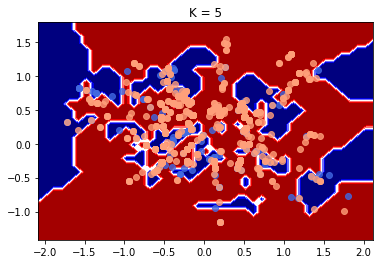

In [23]:
plotDecisionBoundary(knmodel, data_test, label_test)

## K-Means

In [24]:
#Taking Trasforming dataset to create K-Means graph
df = pd.read_csv('Labor_Market_Data_Transforming.csv')
df.head(3)

,SCALEGENERE,SCALETA,SCALESETTORE,SCALETITOLO,SCALECONTRATTO,SCALEMOD,SCALEPROVINCIA,SCALETIPO,SCALENAZIONE
0,1,4,3,0,0,4,0,0,2
1,1,1,3,0,0,4,0,0,1
2,1,1,3,0,1,2,0,0,1


In [25]:
#Create one new dataframes 'df_Prova', starting from df, taking only "SCALEPROVINCIA", "SCALETITOLO", "SCALECONTRATTO" and "SCALESETTORE"
df_Prova = df[["SCALEPROVINCIA", "SCALETITOLO", "SCALECONTRATTO", "SCALESETTORE"]]
df_Prova

,SCALEPROVINCIA,SCALETITOLO,SCALECONTRATTO,SCALESETTORE
0,0,0,0,3
1,0,0,0,3
2,0,0,1,3
3,0,1,0,2
4,0,0,3,1
...,...,...,...,...
113675,0,0,0,4
113676,0,0,0,1
113677,0,2,0,1
113678,0,0,0,4


In [26]:
#Numpy Arrays Implementation to create Bunch Dictionary
data = df_Prova[["SCALETITOLO", "SCALECONTRATTO", "SCALESETTORE"]].to_numpy()
data

array([[0, 0, 3],
       [0, 0, 3],
       [0, 1, 3],
       ...,
       [2, 0, 1],
       [0, 0, 4],
       [1, 2, 1]], dtype=int64)

In [27]:
#Numpy Arrays Implementation to create Bunch Dictionary
target = df_Prova['SCALEPROVINCIA'].to_numpy()
target

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
#Creation of the Bunch for K-Means
result = Bunch(data = data, target = target)
result

{'data': array([[0, 0, 3],
        [0, 0, 3],
        [0, 1, 3],
        ...,
        [2, 0, 1],
        [0, 0, 4],
        [1, 2, 1]], dtype=int64),
 'target': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}

[0]
[0 0 0 ... 1 0 2]


<Axes3DSubplot:title={'center':'First three PCA directions'}, xlabel='Titolo di Studio', ylabel='Contratto'>

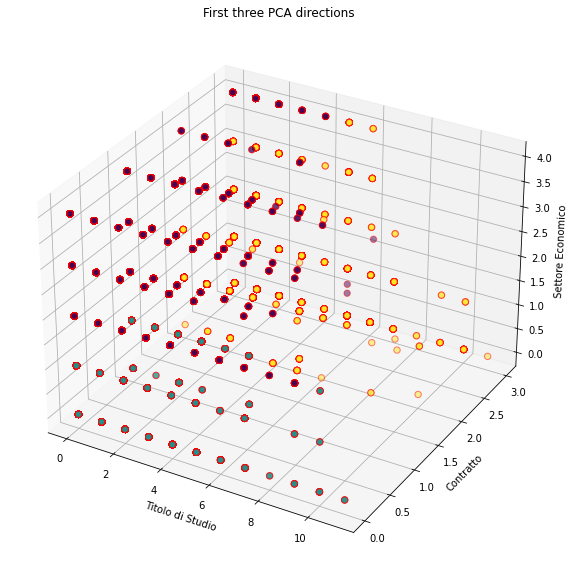

In [29]:
# K-MEANS CLUSTERING
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(result.data)

# Predicitng a single input
predicted_label = model.predict([[10.0, 1.0, 3.0]])    #Values of all columns in the Dataset

# Prediction on the entire data
all_predictions = model.predict(result.data)

# Printing Predictions
print(predicted_label)
print(all_predictions)


# import some data
X = result.data[:, :3]
y = result.target


fig = plt.figure(figsize=(10,10))
plt = fig.add_subplot(111, projection='3d')
plt.scatter(X[:,0], X[:,1], X[:,2],
            c=all_predictions, edgecolor='red', s=40, alpha = 0.5)
plt.set_title("First three PCA directions")
plt.set_xlabel("Titolo di Studio")
plt.set_ylabel("Contratto")
plt.set_zlabel("Settore Economico")
plt.dist = 10
plt